***Project 1: US TRAFFIC ACCIDENTS***

**Step 1: Set up the project environment**

In [41]:
# Need dataset, decided to use path instead of downloading dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MexLo\.cache\kagglehub\datasets\sobhanmoosavi\us-accidents\versions\13


**Step 2: Busness Understanding**

Scenario:

There are various traffic accidents that happen in the US. The Department of Transportation (DOT) wants to develop strategies with analytical data to improve road conditions and reduce accidents occuring across the US.

Objective:

With the provided US_Accidents_dataset, analyzing the dataset to see what facotrs contribute to high amount of accidents. As instructed for my comprehensive analysis, i will provide three data-driven insights that the DOT could utilize to reduce traffic accidents and improve road saftey.

Analytical Questions:

(1.) What times are accidents most occuring in a day?

(2.) Where are accidents happening in the US the most?

(3.) Which state has the most accidents?

(4.) How does optimizing travel routes do whenever there's a traffic congestion caused by any accident?

(5.) What factors causes the accidents to occur at an alarming rate?

Emphasizing the Relevancy of the data:

The importance of US_Accident dataset is that it contains analytical records of traffic accidents that have occurred in the United States. The purpose of this project by analyzing the data would allow to reduce the amount of accidents, pinpoint the location of high accident rates, analyze weather and time frame variables that contribute to accidents.

Concrete Benefits and Goals:

    * Optimize travel route: Redirect travel to reduce the amount of time needed for travel.
    * Predict dangerous and safe routes: Build predictive models from the data to help prevent further accidents.
    * Saftey Improvements: Better usage of resources such as lightings, road repairs, etc.
    * Resource Management: Helps minimize cost for repairs and allocate materials to where its most needed.

Identify Stockholders (Who is the audience?):

    The targeted audience would be officials that deal with transporation matters.
    * City and State Goverments: Allocate resources to high risk areas of accidents to ensure community saftey.
    * Emergency Providers: Optimize route and response time for better efficiency.
    * Transits: Optimizing delivery services to maintain quota and customer satisfaction.
    * General Public: Desirable need for safe traveling and shortcuts for either personal or work related matters.


**Step 3: DATA UNDERSTANDING**

[Load the dataset and explore its structure and basic statistics.]

In [ ]:
import pandas as pd

file_path = f"{path}/US_Accidents_March23.csv"
df = pd.read_csv(file_path)

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [43]:
# Basic info about the dataset
df.info()

# Basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


There's 4 dtypes given:

    * Bool(13): Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop

    * Float(12): Start_Lat, Start_Lng, End_Lat, End_Lng,  Distance(mi), Temperature (F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Speed(mph), Precipitation(in)

    * int64(1): Severity

    * object(20): ID, Source, Start_Time, End_Time, Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_TimeStamp, Wind_Direction, Weather_Conditions


Documentation of variable meaning

Giving description and relevance of the 45 variables in the dataset above.

**ID: Identifier for each accident record.**

    * Relevance: Tracking individual records with ease. *

**Source: Data provider**
    * Relevance: Helps evaluate data properly. *

**Severity: Numerical scale of traffic impact from accident(s)**

    * Relevance: Contribute the level of intensity of the accident *

Start_Time: Beginning timestamp of accident

    * Relevance: Allows to monitor time trend analysis

End_Time: Ending timestamp of accident

    * Relevance: Measures duration of accident.

Start_Lat: Latitude of accident starting location

    * Relevance: Use for geographical mapping and hotspot detection

Start_Lng: Longitude of accident starting location

    * Relevance: Use for geographical mapping and hotspot detection as well as coordinate pairing with latitude.

End_Lat: Latitude of accident ending location (Would most likely stay in same location)

    * Relevance: Use for coordinate pairing and distance calculation

End_Lng: Longititude of accident ending location

    * Relevance: Helps define distance with coordinate pairing

Distance(mi): Estimated length of accident area

    * Relevance: Impacted area for traffic flow

Description: Detailed text that gives information about the accident that occurred

    * Relevance: Common themes with keywords to relate with accident(s)

Street: The detailed name of the address where the accident occured

    * Relevance: Useful to pinpoint local location in an area 

City: High populated urban area where accident occurred.

    * Relevance: City level hot spots

County: County of the accident

    *Relevance: Allows regional analysis

State: State Code (Ex. TX)

    * Relvance: Comparison accidents across states and more broader geographical anaylsis

Zipcode: Postal code of location

    * Relevance: Useful for demographic data

Country: Country where accident occurred (Only US in this dataset)

    * Relevance: Not relevant due to lacking other countries for significant analysis

Timezone: Time of accident location

    * Relevance: Accuracy across diverse geographies

Airport_Code: Nearest airport code to the accident location

    * Relevance: Traffic in areas near airports

Weather_Timestamp: Time weather observation measurements were taken

    * Relevamce: Ensures relevant weather data to the accident

Temperature(F): Temperature near the accident

    * Relevance: Useful for climate related risk trends

Wind_Chill(F): Wind chill in Farenheit at the accident

    * Relevance: Potential factor in affecting driver performance

Humidity(%): Air moisture percentage

    * Relevance: Potential factor to visibilty of drivers on the road

Pressure(in): Atmospheric pressure

    * Relevance: Part of a more complex analysis model

Visibility: Distance visible to drivers on the road

    * Relevance: Low visibility leads to higher chance of collision and accidents. High visibility if possible is ideal

Wind_Direction: The direction the wind at the time of the accident

    * Relevance: Strong winds can influence driver performance and saftey on the road

Wind_Speed(mph): Speed measurement of wind at the time of the accident

    * Relevance: High winds can lead to reduce vehicle control

Precipitation(in): Amount of precipitation in inches at the time of the accident

    * Relevance: Precipitation affects weather conditions such as ice, snow, or rain that increases weather related accidents

Weather_Conditions: Text description of weather at the time the accident occurred

    * Relevance: Categorical value for severity modeling

Amenity: Whether accident occurred near areas like park or hosptials

    * Relevance: Pedestrian activity in the area

Bump: Presence of a speed bump

    * Relevance: Reduces speeding

Crossing: Nearby rail crossing

    * Relevance: Pedestrian collisions

Give_Way: Yield sign 

    * Relevance: Useful for modeling intersection related crashes

Junction: Indicates if accident occurred near a junction

    * Relevance: Intersections account for the majority of collisions in a urban area

No_Exit: Accident occurred in areas without an exit

    * Relevance: Low traffic areas that are often minor collisions

Railway: Railway crossing is present at the accident

    * Relevance: Accidents involving railway crossing or trains

Roundabout: Presence of roundabout

    * Relevance: Reduces severe accidents

Station: Near a transit station

    * Relevance: Pedestrian heavy zones

Stop: Presence of a stop sign

    * Relevance: Useful for intersection behavior modeling

Traffic_Calming: If traffic calming levels contribute to the accident

    * Relvance: Lower severity crashes

Traffic_Signal: Lighted signal present

    * Relevance: Intersection control and crash type prediction

Turning_Loop: If a turning loop was present at the accident

    * Relevance: Road design that potentially be a factor to accident types

Sunrise_Sunset: Daylight Classification (Day/Night)

    * Relevance: Correlations to visibilty and light conditions impacting driver performance

Civil_Twilight: Natural light is low but visibilty remains

    * Relevance: Useful for modeling dawn/dusk crash analysis

Nautical_Twilight: More darker than civil twilight

    * Relevance: Similar to civil twilight relevance and impacting driver visibilty

Astronomical_Twilight: Very low natural lighting

    * Relevance: Most detailed data on light conditions due to its level differiantation from other twilight lighting



Access Data Quality Issues (missing values(data), outliers, inconsistencies)

In [44]:
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
})
missing_data_df = missing_data_df[missing_data_df['Missing Values'] > 0]
missing_data_df.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
End_Lat,3402762,44.029355
End_Lng,3402762,44.029355
Precipitation(in),2203586,28.512858
Wind_Chill(F),1999019,25.865904
Wind_Speed(mph),571233,7.391355
Visibility(mi),177098,2.291524
Wind_Direction,175206,2.267043
Humidity(%),174144,2.253301
Weather_Condition,173459,2.244438
Temperature(F),163853,2.120143


Output showed End_Lat, End_Lng, Precipitation(in), and Wind_Speed(mph) had the greater percentage of missing values. Must also see if there's any inconsistencies.

In [45]:
# Check for inconsistent data in categorical columns:
categorical_columns = df.select_dtypes(include=['object']).columns
# Putting dype object in the code to decrease writing down each column name

for col in categorical_columns:
    display(f"Value counts for column: {col}")
    display(df[col].value_counts())
     

'Value counts for column: ID'

ID
A-1          1
A-5191324    1
A-5191336    1
A-5191335    1
A-5191334    1
            ..
A-2585999    1
A-2585998    1
A-2585997    1
A-2585996    1
A-7777761    1
Name: count, Length: 7728394, dtype: int64

'Value counts for column: Source'

Source
Source1    4325632
Source2    3305373
Source3      97389
Name: count, dtype: int64

'Value counts for column: Start_Time'

Start_Time
2021-01-26 16:16:13    225
2021-01-26 16:17:33    156
2021-02-16 06:42:43    139
2021-11-21 18:37:51    108
2020-12-16 13:53:25     96
                      ... 
2019-04-16 07:29:32      1
2019-04-16 07:26:57      1
2019-04-16 07:27:55      1
2019-04-16 07:25:08      1
2019-08-23 18:52:06      1
Name: count, Length: 6131796, dtype: int64

'Value counts for column: End_Time'

End_Time
2021-11-22 08:00:00    112
2017-05-15 15:22:55     73
2019-10-26 09:14:51     49
2020-02-14 00:00:00     46
2018-11-25 02:51:02     46
                      ... 
2019-01-27 03:35:12      1
2019-01-27 03:01:18      1
2019-01-27 02:32:22      1
2019-01-27 02:29:26      1
2019-08-23 19:21:31      1
Name: count, Length: 6705355, dtype: int64

'Value counts for column: Description'

Description
A crash has occurred causing no to minimum delays. Use caution.                                        9593
Accident                                                                                               6616
An unconfirmed report of a crash has been received. Use caution.                                       3799
A crash has occurred use caution.                                                                      2894
A crash has occurred with minimal delay to traffic. Prepare to slow or move over for worker safety.    2672
                                                                                                       ... 
Accident on 49th St at Odell St.                                                                          1
Accident on Royal Ascot Ave at Coursey Blvd.                                                              1
Accident on LA-3245 O'neal Ln at I-12.                                                                    1
Accident on Rive

'Value counts for column: Street'

Street
I-95 N                  78430
I-95 S                  74528
I-5 N                   71968
I-10 E                  55572
I-10 W                  53725
                        ...  
W Diamond Valley Dr         1
S Jasper St                 1
State RT 17 N               1
 S Lake Mary Jane Rd        1
473-401 Cutoff Rd           1
Name: count, Length: 336306, dtype: int64

'Value counts for column: City'

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

'Value counts for column: County'

County
Los Angeles        526851
Miami-Dade         251601
Orange             241275
Harris             181196
Dallas             157024
                    ...  
Mclean                  1
Poquoson (City)         1
Dewitt                  1
Frontier                1
Ness                    1
Name: count, Length: 1871, dtype: int64

'Value counts for column: State'

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

'Value counts for column: Zipcode'

Zipcode
91761         11247
91706         10022
92407          8922
92507          8850
33186          8375
              ...  
29349-9729        1
27263-8819        1
28208-2854        1
24416-1269        1
94401-2213        1
Name: count, Length: 825094, dtype: int64

'Value counts for column: Country'

Country
US    7728394
Name: count, dtype: int64

'Value counts for column: Timezone'

Timezone
US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: count, dtype: int64

'Value counts for column: Airport_Code'

Airport_Code
KCQT    118332
KRDU    107267
KMCJ    101786
KBNA     98926
KCLT     97273
         ...  
KP58         1
KWRL         1
KMRH         1
K7R5         1
KICR         1
Name: count, Length: 2045, dtype: int64

'Value counts for column: Weather_Timestamp'

Weather_Timestamp
2022-03-13 01:53:00    1311
2021-01-26 15:53:00     651
2022-05-13 16:53:00     558
2022-03-13 01:55:00     545
2021-01-15 22:53:00     521
                       ... 
2018-08-31 14:01:00       1
2018-08-31 11:58:00       1
2018-08-31 10:36:00       1
2018-08-31 05:30:00       1
2019-08-23 01:20:00       1
Name: count, Length: 941331, dtype: int64

'Value counts for column: Wind_Direction'

Wind_Direction
CALM        961624
S           419989
SSW         384840
W           383913
WNW         378781
NW          369352
Calm        368557
SW          364470
WSW         353806
SSE         349110
NNW         333427
N           307151
SE          294901
E           278914
ESE         268311
NE          258639
ENE         258474
NNE         255311
VAR         250566
South       177375
West        164751
North       153385
Variable    113996
East        103545
Name: count, dtype: int64

'Value counts for column: Weather_Condition'

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

'Value counts for column: Sunrise_Sunset'

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

'Value counts for column: Civil_Twilight'

Civil_Twilight
Day      5695619
Night    2009529
Name: count, dtype: int64

'Value counts for column: Nautical_Twilight'

Nautical_Twilight
Day      6076156
Night    1628992
Name: count, dtype: int64

'Value counts for column: Astronomical_Twilight'

Astronomical_Twilight
Day      6377548
Night    1327600
Name: count, dtype: int64

STEP 4: DATA PREPARATION

Handle Missing values, Address outliers that may skew analysis, Convert data types as needed (dates, categorical variables,etc.)

In [46]:
# Need to preserve original datadframe before cleaning and any modifications
df_original = df.copy()

In [47]:
# To reduce outliers that may skew the analysis End_Lat and End_Lng will be removed due to their high number of missing values. Cleaning up the dataset.add
df = df.drop (['End_Lat', 'End_Lng', 'Wind_Chill(F)','Precipitation(in)'], axis=1)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Humidity(%)            float64
 20  Pressure(in)           float64
 21  Visibility(mi)         float64
 22  Wind_Direction    

In [48]:
cols = df.select_dtypes(include=['float64']).columns
display(missing_data_df)

,Missing Values,Percentage
End_Lat,3402762,44.029355
End_Lng,3402762,44.029355
Description,5,0.000065
Street,10869,0.140637
City,253,0.003274
Zipcode,1915,0.024779
Timezone,7808,0.101030
Airport_Code,22635,0.292881
Weather_Timestamp,120228,1.555666
Temperature(F),163853,2.120143


**Convert Data types (Dates, Categorical variables, etc)**

In [49]:
# Convert columns to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format= 'mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'], format= 'mixed')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format= 'mixed')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)        

In [50]:
df[['Start_Time', 'End_Time', 'Weather_Timestamp']]


,Start_Time,End_Time,Weather_Timestamp
0,2016-02-08 05:46:00,2016-02-08 11:00:00,2016-02-08 05:58:00
1,2016-02-08 06:07:59,2016-02-08 06:37:59,2016-02-08 05:51:00
2,2016-02-08 06:49:27,2016-02-08 07:19:27,2016-02-08 06:56:00
3,2016-02-08 07:23:34,2016-02-08 07:53:34,2016-02-08 07:38:00
4,2016-02-08 07:39:07,2016-02-08 08:09:07,2016-02-08 07:53:00
...,...,...,...
7728389,2019-08-23 18:03:25,2019-08-23 18:32:01,2019-08-23 17:53:00
7728390,2019-08-23 19:11:30,2019-08-23 19:38:23,2019-08-23 18:53:00
7728391,2019-08-23 19:00:21,2019-08-23 19:28:49,2019-08-23 18:53:00
7728392,2019-08-23 19:00:21,2019-08-23 19:29:42,2019-08-23 18:51:00


In [51]:
df.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,7.728394e+06,7728394,7728394,7.728394e+06,7.728394e+06,7.728394e+06,7608166,7.564541e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06
mean,2.212384e+00,2020-06-04 04:23:22.765653760,2020-06-04 11:47:48.023095040,3.620119e+01,-9.470255e+01,5.618423e-01,2020-06-02 10:06:41.888674560,6.166329e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00
min,1.000000e+00,2016-01-14 20:18:33,2016-02-08 06:37:08,2.455480e+01,-1.246238e+02,0.000000e+00,2016-01-14 19:51:00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2018-11-23 04:01:12.249999872,2018-11-23 05:45:20.500000,3.339963e+01,-1.172194e+02,0.000000e+00,2018-11-20 18:35:00,4.900000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00
50%,2.000000e+00,2020-11-11 08:40:22,2020-11-11 15:56:29,3.582397e+01,-8.776662e+01,3.000000e-02,2020-11-10 13:53:00,6.400000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00
75%,2.000000e+00,2022-01-20 07:30:08.500000,2022-01-20 17:44:40,4.008496e+01,-8.035368e+01,4.640000e-01,2022-01-19 14:27:00,7.600000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01
max,4.000000e+00,2023-03-31 23:30:00,2023-03-31 23:59:00,4.900220e+01,-6.711317e+01,4.417500e+02,2023-03-31 23:53:00,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03
std,4.875313e-01,NaN,NaN,5.076079e+00,1.739176e+01,1.776811e+00,NaN,1.901365e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00


In [52]:
import numpy as np

# Time features from Start_Time
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Hour"] = df["Start_Time"].dt.hour
df["DayOfWeek"] = df["Start_Time"].dt.day_name()

df["Is_Weekend"] = df["DayOfWeek"].isin(["Saturday", "Sunday"])
df["Is_Night"] = df["Hour"].between(20, 23) | df["Hour"].between(0, 5)

# Simple "adverse weather" flag
adverse_terms = ["Rain", "Snow", "Fog", "Thunderstorm", "Sleet", "Hail", "Ice"]
df["Weather_Simplified"] = np.where(
    df["Weather_Condition"].str.contains("|".join(adverse_terms), case=False, na=False),
    "Adverse",
    "Clear/Other"
)

df[["Severity", "Year", "Month", "Hour", "DayOfWeek", "Is_Weekend", "Is_Night", "Weather_Simplified"]].head()


,Severity,Year,Month,Hour,DayOfWeek,Is_Weekend,Is_Night,Weather_Simplified
0,3,2016,2,5,Monday,False,True,Adverse
1,2,2016,2,6,Monday,False,False,Adverse
2,2,2016,2,6,Monday,False,False,Clear/Other
3,3,2016,2,7,Monday,False,False,Clear/Other
4,2,2016,2,7,Monday,False,False,Clear/Other


**Descriptive Statistics**

To understand overall pattern to the accidents:

- Distribution **accident severity**.
- Accident counts by **state** and **city**.
- Counts by **hour**, **day of week**, and **weather category**.

In [53]:
# Severity distribution
severity_counts = df["Severity"].value_counts().sort_index()
severity_counts


Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64

In [54]:
# Accidents by state (top 10)
df["State"].value_counts().head(10)


State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

In [55]:
# Accidents by day of week
df["DayOfWeek"].value_counts()


DayOfWeek
Friday       1366499
Thursday     1316229
Wednesday    1312389
Tuesday      1290929
Monday       1210921
Saturday      668683
Sunday        562744
Name: count, dtype: int64

***Step 5: EXPLORATORY DATA ANALYSIS***

Alluding to the Business Understanding section. Perform EDA to answer the questions stated earlier in step 2.

In [56]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np 


When do most severe accidents occur? (Time during the day accidents occurrs)

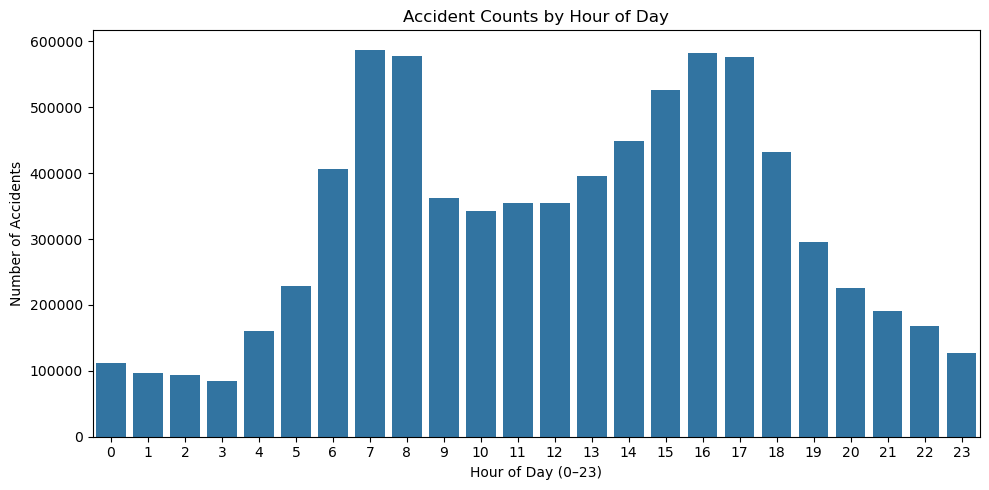

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Hour", data=df, order=sorted(df["Hour"].unique()))
plt.title("Accident Counts by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Accidents tend to peak during **commute hours** (Morning and late afternoon [Rush hours]). As well a higher number of accidents occurring at night. **Consideration for DOT** would be to install more lighting amd signage in the areas with accidents at night.

Where are accidents occurring in the US?

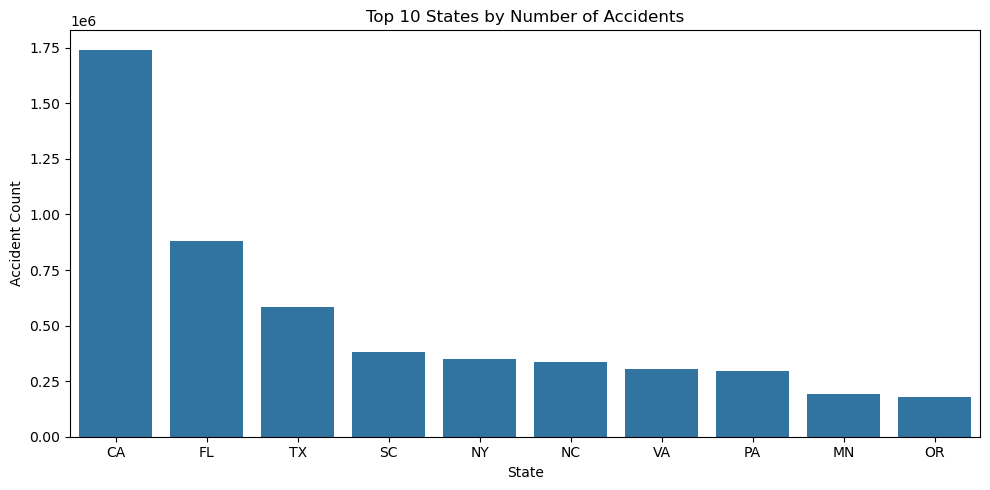

In [62]:
top_states = df["State"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States by Number of Accidents")
plt.xlabel("State")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


A small number of states account for a large amount of accidents in the US. This would help DOT to prioritze infrastructure upgrades and allocate more resources in these states.

Are accidents affected by simplified weather conditions?

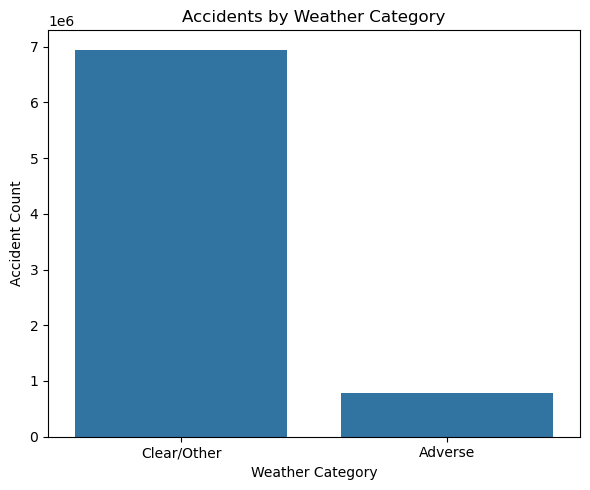

In [64]:
plt.figure(figsize=(6, 5))
weather_counts = df["Weather_Simplified"].value_counts()
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title("Accidents by Weather Category")
plt.xlabel("Weather Category")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()


***Step 6: Statistical Data Analysis***

Chi-square test

In [67]:
# Contingency table: Severity vs Weather_Simplified
contingency = pd.crosstab(df["Severity"], df["Weather_Simplified"])
contingency


Weather_Simplified,Adverse,Clear/Other
Severity,,
1,4121,63245
2,612610,5544371
3,144820,1154517
4,22399,182311


In [69]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
chi2, p
chi2, p


(3026.278202883344, 0.0)

ANOVA Test

In [71]:
from scipy.stats import f_oneway

# Groups
groups = [group["Distance(mi)"].values for _, group in df.groupby("Severity")]

# ANOVA (parametric)
f_stat, p_anova = f_oneway(*groups)
f_stat, p_anova
f_stat, p_anova


(23107.70078304875, 0.0)

In [73]:
from scipy.stats import kruskal

# Non-parametric alternative (Kruskal-Wallis)
h_stat, p_kw = kruskal(*groups)
h_stat, p_kw
h_stat, p_kw


(645911.2634046011, 0.0)

In [76]:
from scipy.stats import spearmanr

# Choose a subset of numeric features
num_features = ["Distance(mi)", "Temperature(F)", "Humidity(%)", "Visibility(mi)", "Wind_Speed(mph)"]
num_features = [f for f in num_features if f in df.columns]

corr_results = {}
for col in num_features:
    # Choose a subset of numeric features
    num_features = ["Distance(mi)", "Temperature(F)", "Humidity(%)", "Visibility(mi)", "Wind_Speed(mph)"]
    num_features = [f for f in num_features if f in df.columns]

    corr_results = {}

    for col in num_features:
        s1 = df["Severity"]
        s2 = df[col]
        mask = s1.notna() & s2.notna()
        if mask.sum() == 0:
            rho, p_val = (np.nan, np.nan)
        else:
            rho, p_val = spearmanr(s1[mask], s2[mask])
        corr_results[col] = {"Spearman_rho": rho, "p_value": p_val}

    pd.DataFrame(corr_results).T
    corr_results[col] = {"Spearman_rho": rho, "p_value": p_val}

pd.DataFrame(corr_results).T


,Spearman_rho,p_value
Distance(mi),-0.137544,0.000000e+00
Temperature(F),-0.011003,3.455051e-201
Humidity(%),0.016886,0.000000e+00
Visibility(mi),-0.011203,4.103033e-208
Wind_Speed(mph),0.049070,0.000000e+00


 ***Step 7: Recommendations for DOT***

Based on the analysis, we highlight three key insights:

1. **High-risk time windows (commute & night hours)**  
   - Accidents cluster around **morning and evening commute hours**, with night-time hours showing a higher share of severe crashes than morning hours.
   - **Recommendation**: Focus enforcement, dynamic speed controls, and public messaging during these time windows, especially at high-risk corridors.

2. **Geographical concentration of accidents**
   - A small set of states and metropolitan areas account for a disproportionate share of accidents and severe crashes.
   - **Recommendation**: Prioritize these regions for infrastructure upgrades (lighting, signal timing, road geometry improvements) and for pilot safety technology deployments.

3. **Adverse weather and problematic road features**  
   - Adverse weather conditions (rain, snow, fog) and certain road features (junctions, crossings, traffic signals) are associated with higher accident risk and/or severity.
   - **Recommendation**: Implement weather-responsive speed management, improve drainage and road friction, and redesign high-risk intersections or crossings.

A **data-driven analysis** for DOT to allocate resources, design targeted safety interventions, and measure the impact of future policies and infrastructure projects.
